<a href="https://colab.research.google.com/github/iraseel74/mining-project/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data mining Technique

Classification:

Information Gain (entropy):

Splitting Data into: 60% Training and 40% Test
The model is trained utilizing the information gain(entropy)
and Gini index.

same thing with dividing 70%-30% and 80%-20%


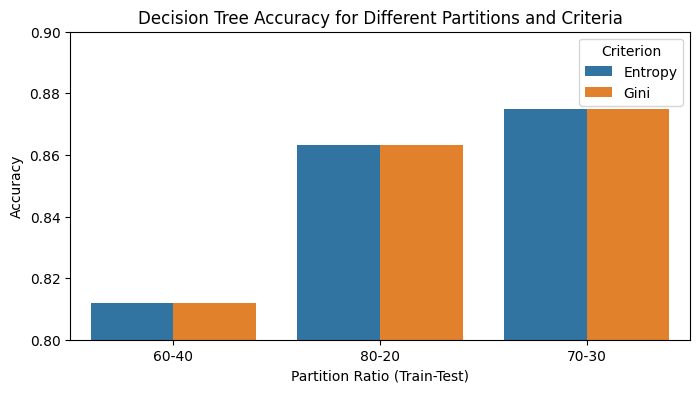

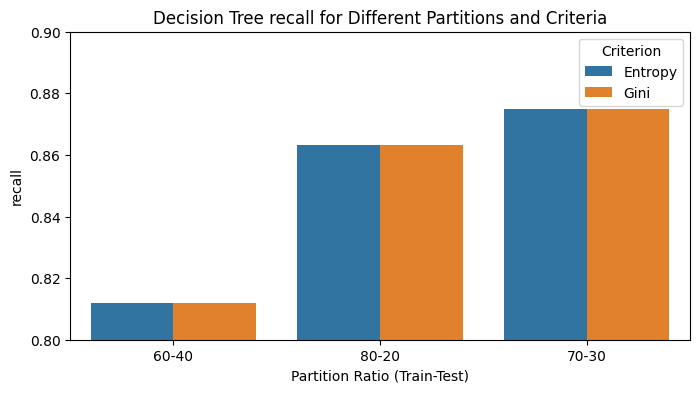

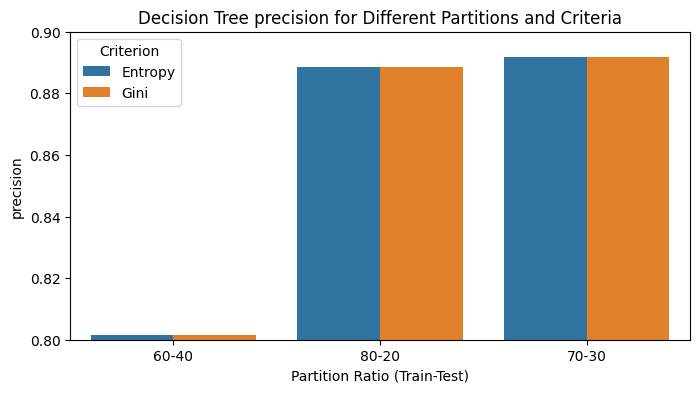

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Processed_dataset.csv')

# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le



# Define partition sizes and attribute selection criteria
partition_ratios = [0.6, 0.8, 0.7]
criteria = ['entropy', 'gini']

# Prepare lists to store results
results = {'Partition': [], 'Criterion': [], 'Accuracy': [], 'recall': [], 'precision': []}

# Separate features and target variable
X = data.drop(columns=['G3'])
y = data['G3']

# Iterate through each partition size and criterion
for ratio in partition_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    for criterion in criteria:
        # Initialize and train the decision tree model
        model = DecisionTreeClassifier(criterion=criterion, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions and calculate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')

        # Store results
        results['Partition'].append(f'{int(ratio * 100)}-{100 - int(ratio * 100)}')
        results['Criterion'].append(criterion.capitalize())
        results['Accuracy'].append(accuracy)
        results['recall'].append(recall)
        results['precision'].append(precision)

# Convert results to a DataFrame for easier analysis and display
results_df = pd.DataFrame(results)
results_df

# Set up the visual representation of results
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x='Partition', y='Accuracy', hue='Criterion')
plt.title('Decision Tree Accuracy for Different Partitions and Criteria')
plt.ylabel('Accuracy')
plt.xlabel('Partition Ratio (Train-Test)')
plt.ylim(0.8, 0.9)  # Adjust y-axis for clarity
plt.legend(title='Criterion')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x='Partition', y='recall', hue='Criterion')
plt.title('Decision Tree recall for Different Partitions and Criteria')
plt.ylabel('recall')
plt.xlabel('Partition Ratio (Train-Test)')
plt.ylim(0.8, 0.9)  # Adjust y-axis for clarity
plt.legend(title='Criterion')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x='Partition', y='precision', hue='Criterion')
plt.title('Decision Tree precision for Different Partitions and Criteria')
plt.ylabel('precision')
plt.xlabel('Partition Ratio (Train-Test)')
plt.ylim(0.8, 0.9)  # Adjust y-axis for clarity
plt.legend(title='Criterion')
plt.show()

The chart shows how well the model predicts using different data splits and decision methods.

- **Data Splits**: A 70-30 split (70% training, 30% testing) worked best, with the highest accuracy(~0.87), recall(~0.87), and precision(~0.89).
- **Methods**: Entropy and Gini performed about the same.
* Accuracy: measures the proportion of true results. In this case, the model's accuracy is approximately 87%.
* Recall : measures the proportion of actual positives that are correctly.In this case, it's approximately 87%.
* Precision : the proportion of positive identifications that were actually correct. Here, it's about 89%.

in conclusion: The 70-30 split gave the best results, and both methods worked equally well.

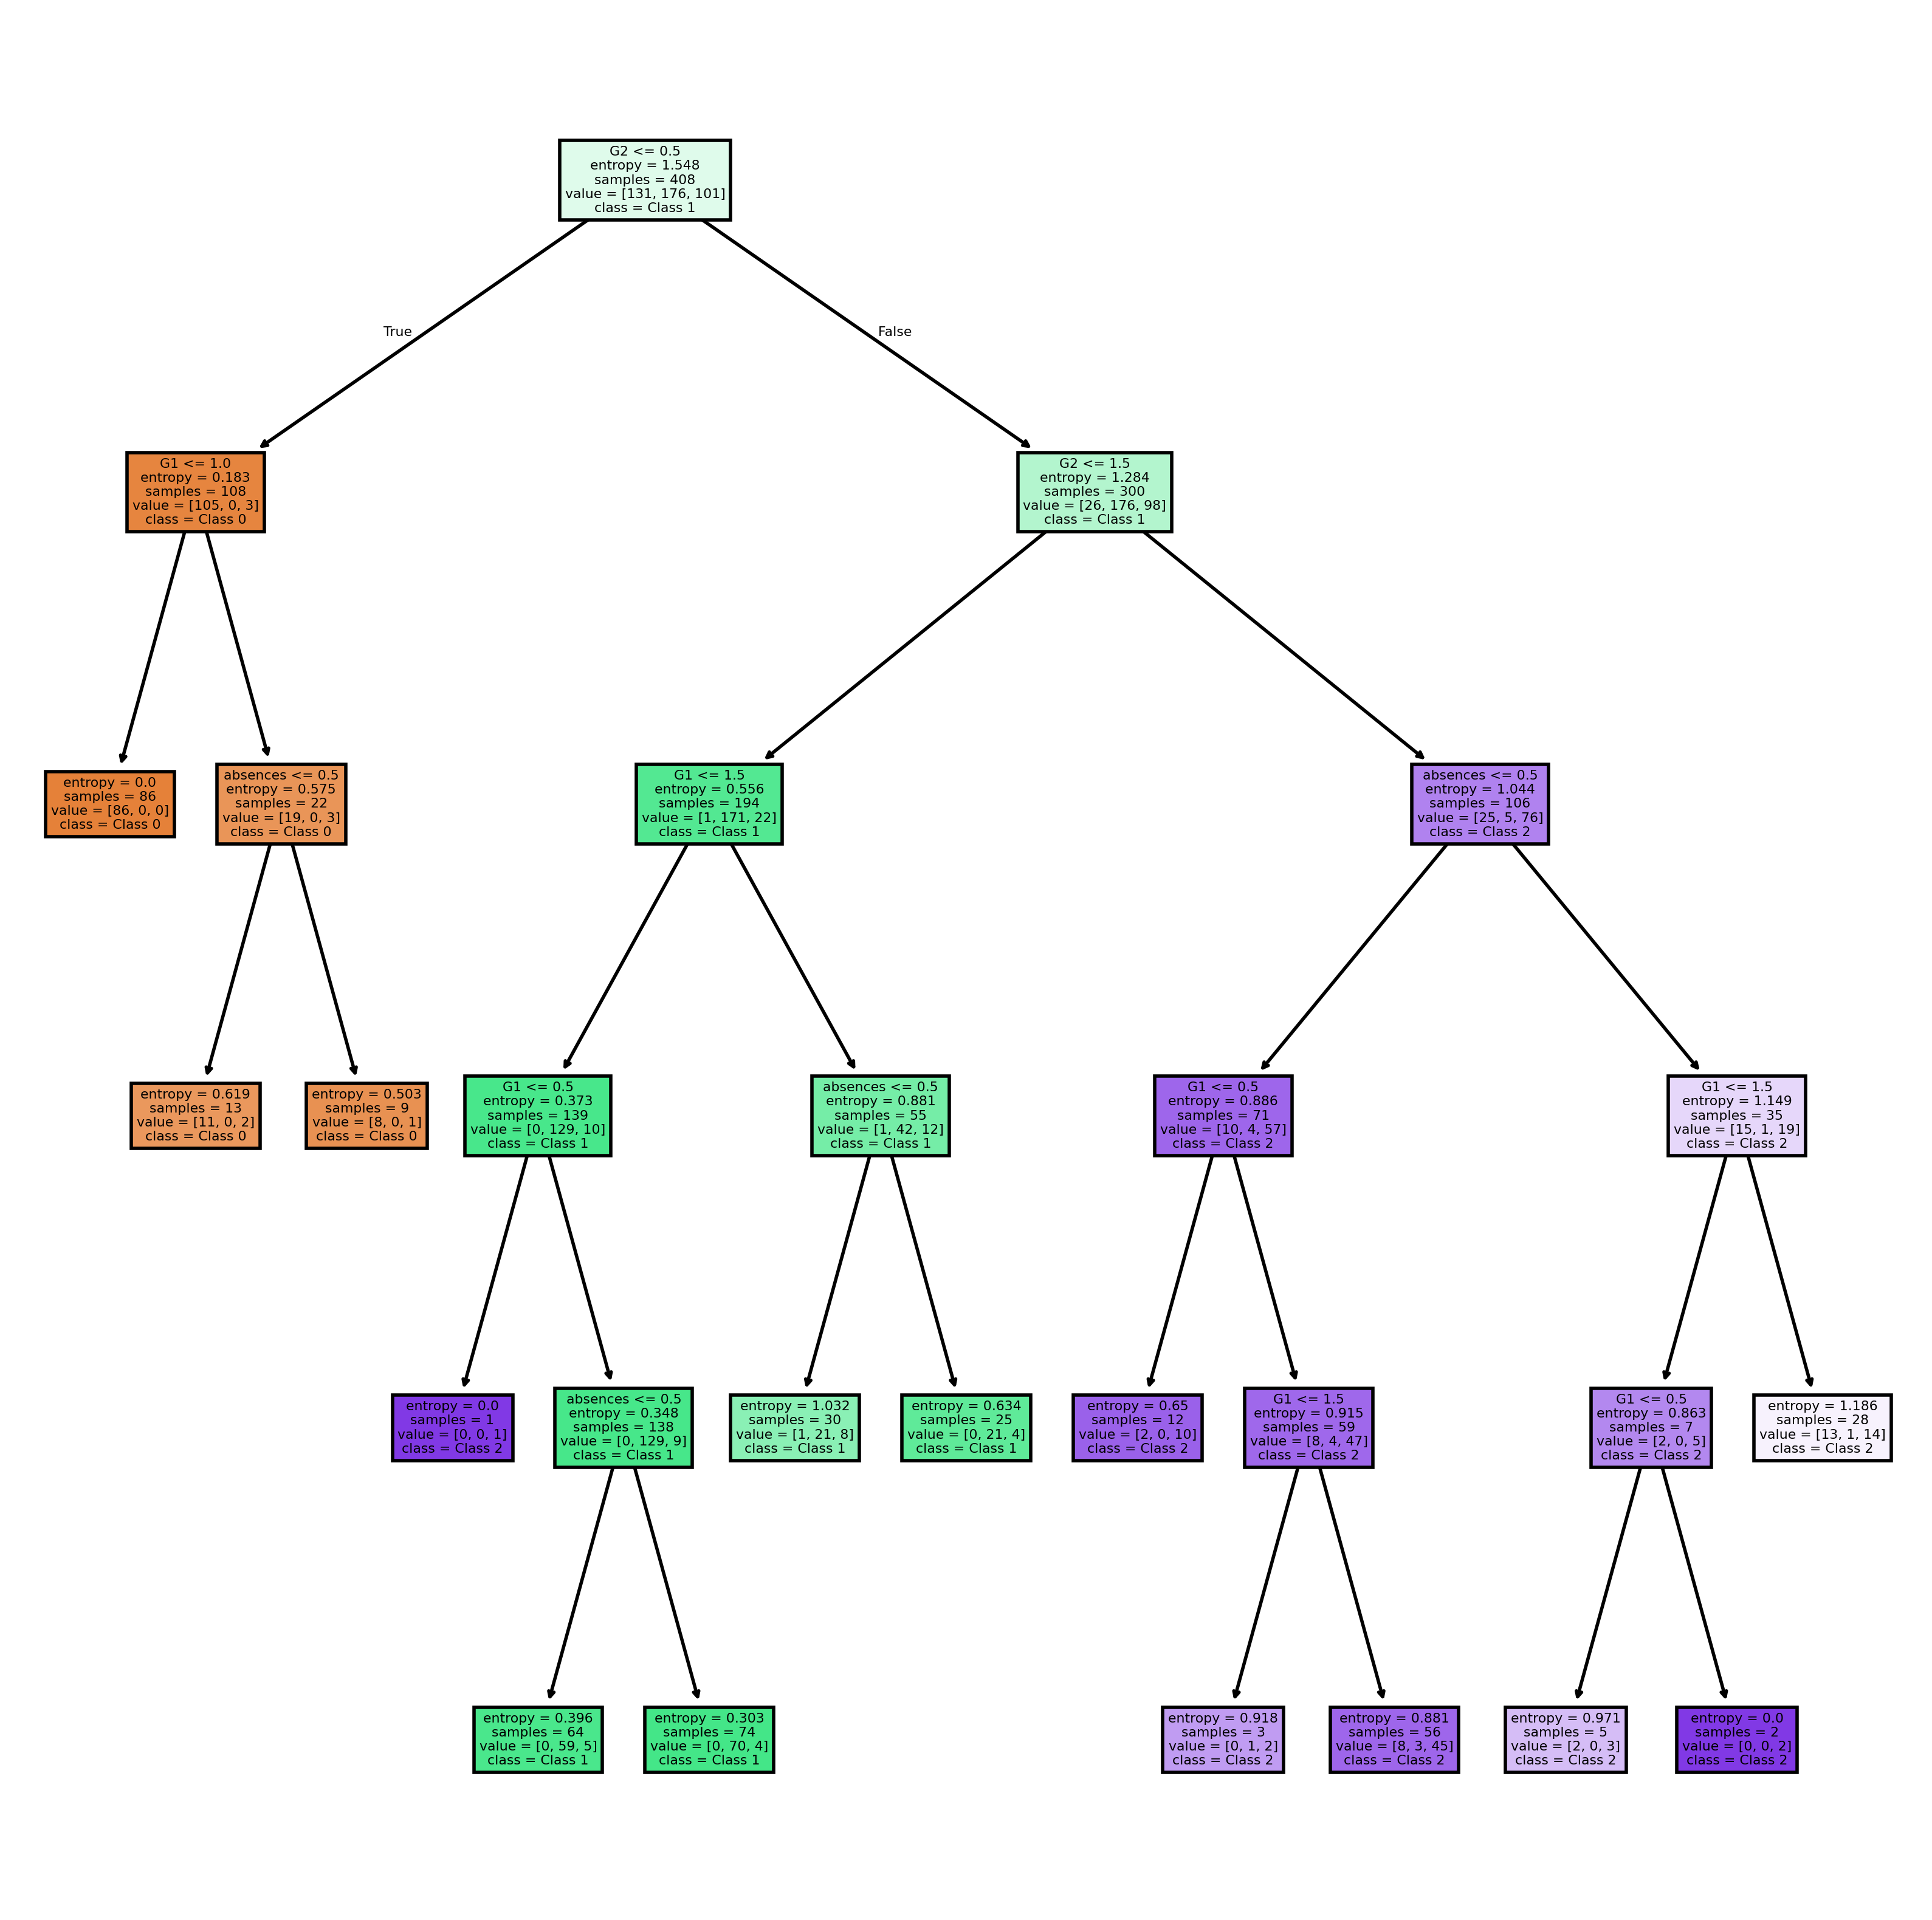

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
feature_names = X.columns
# Get unique class labels from the target variable
class_labels = {i: f'Class {i}' for i in y_train.unique()}

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)
from sklearn.tree import plot_tree
plot_tree(clf,
          feature_names=feature_names,
          # Create a list of class names dynamically
          class_names=[class_labels[i] for i in range(len(class_labels))],
          filled=True)
plt.show()

^This Decision Tree shows how the model predicts the final grade (G3) based on features like absences, G1, and G2, using entropy to make splits and decide the class. If the predicted class is 0, G3 is low; if 1, G3 is medium; and if 2, G3 is high. The tree starts at the root with G2 <= 0.5 and splits the data into two paths: True (left) or False (right). Each step evaluates features like absences or G1 to refine the splits further. At the end of each path (leaf), the tree predicts whether the final grade (G3) is low (class 0), medium (class 1), or high (class 2), based on the provided data


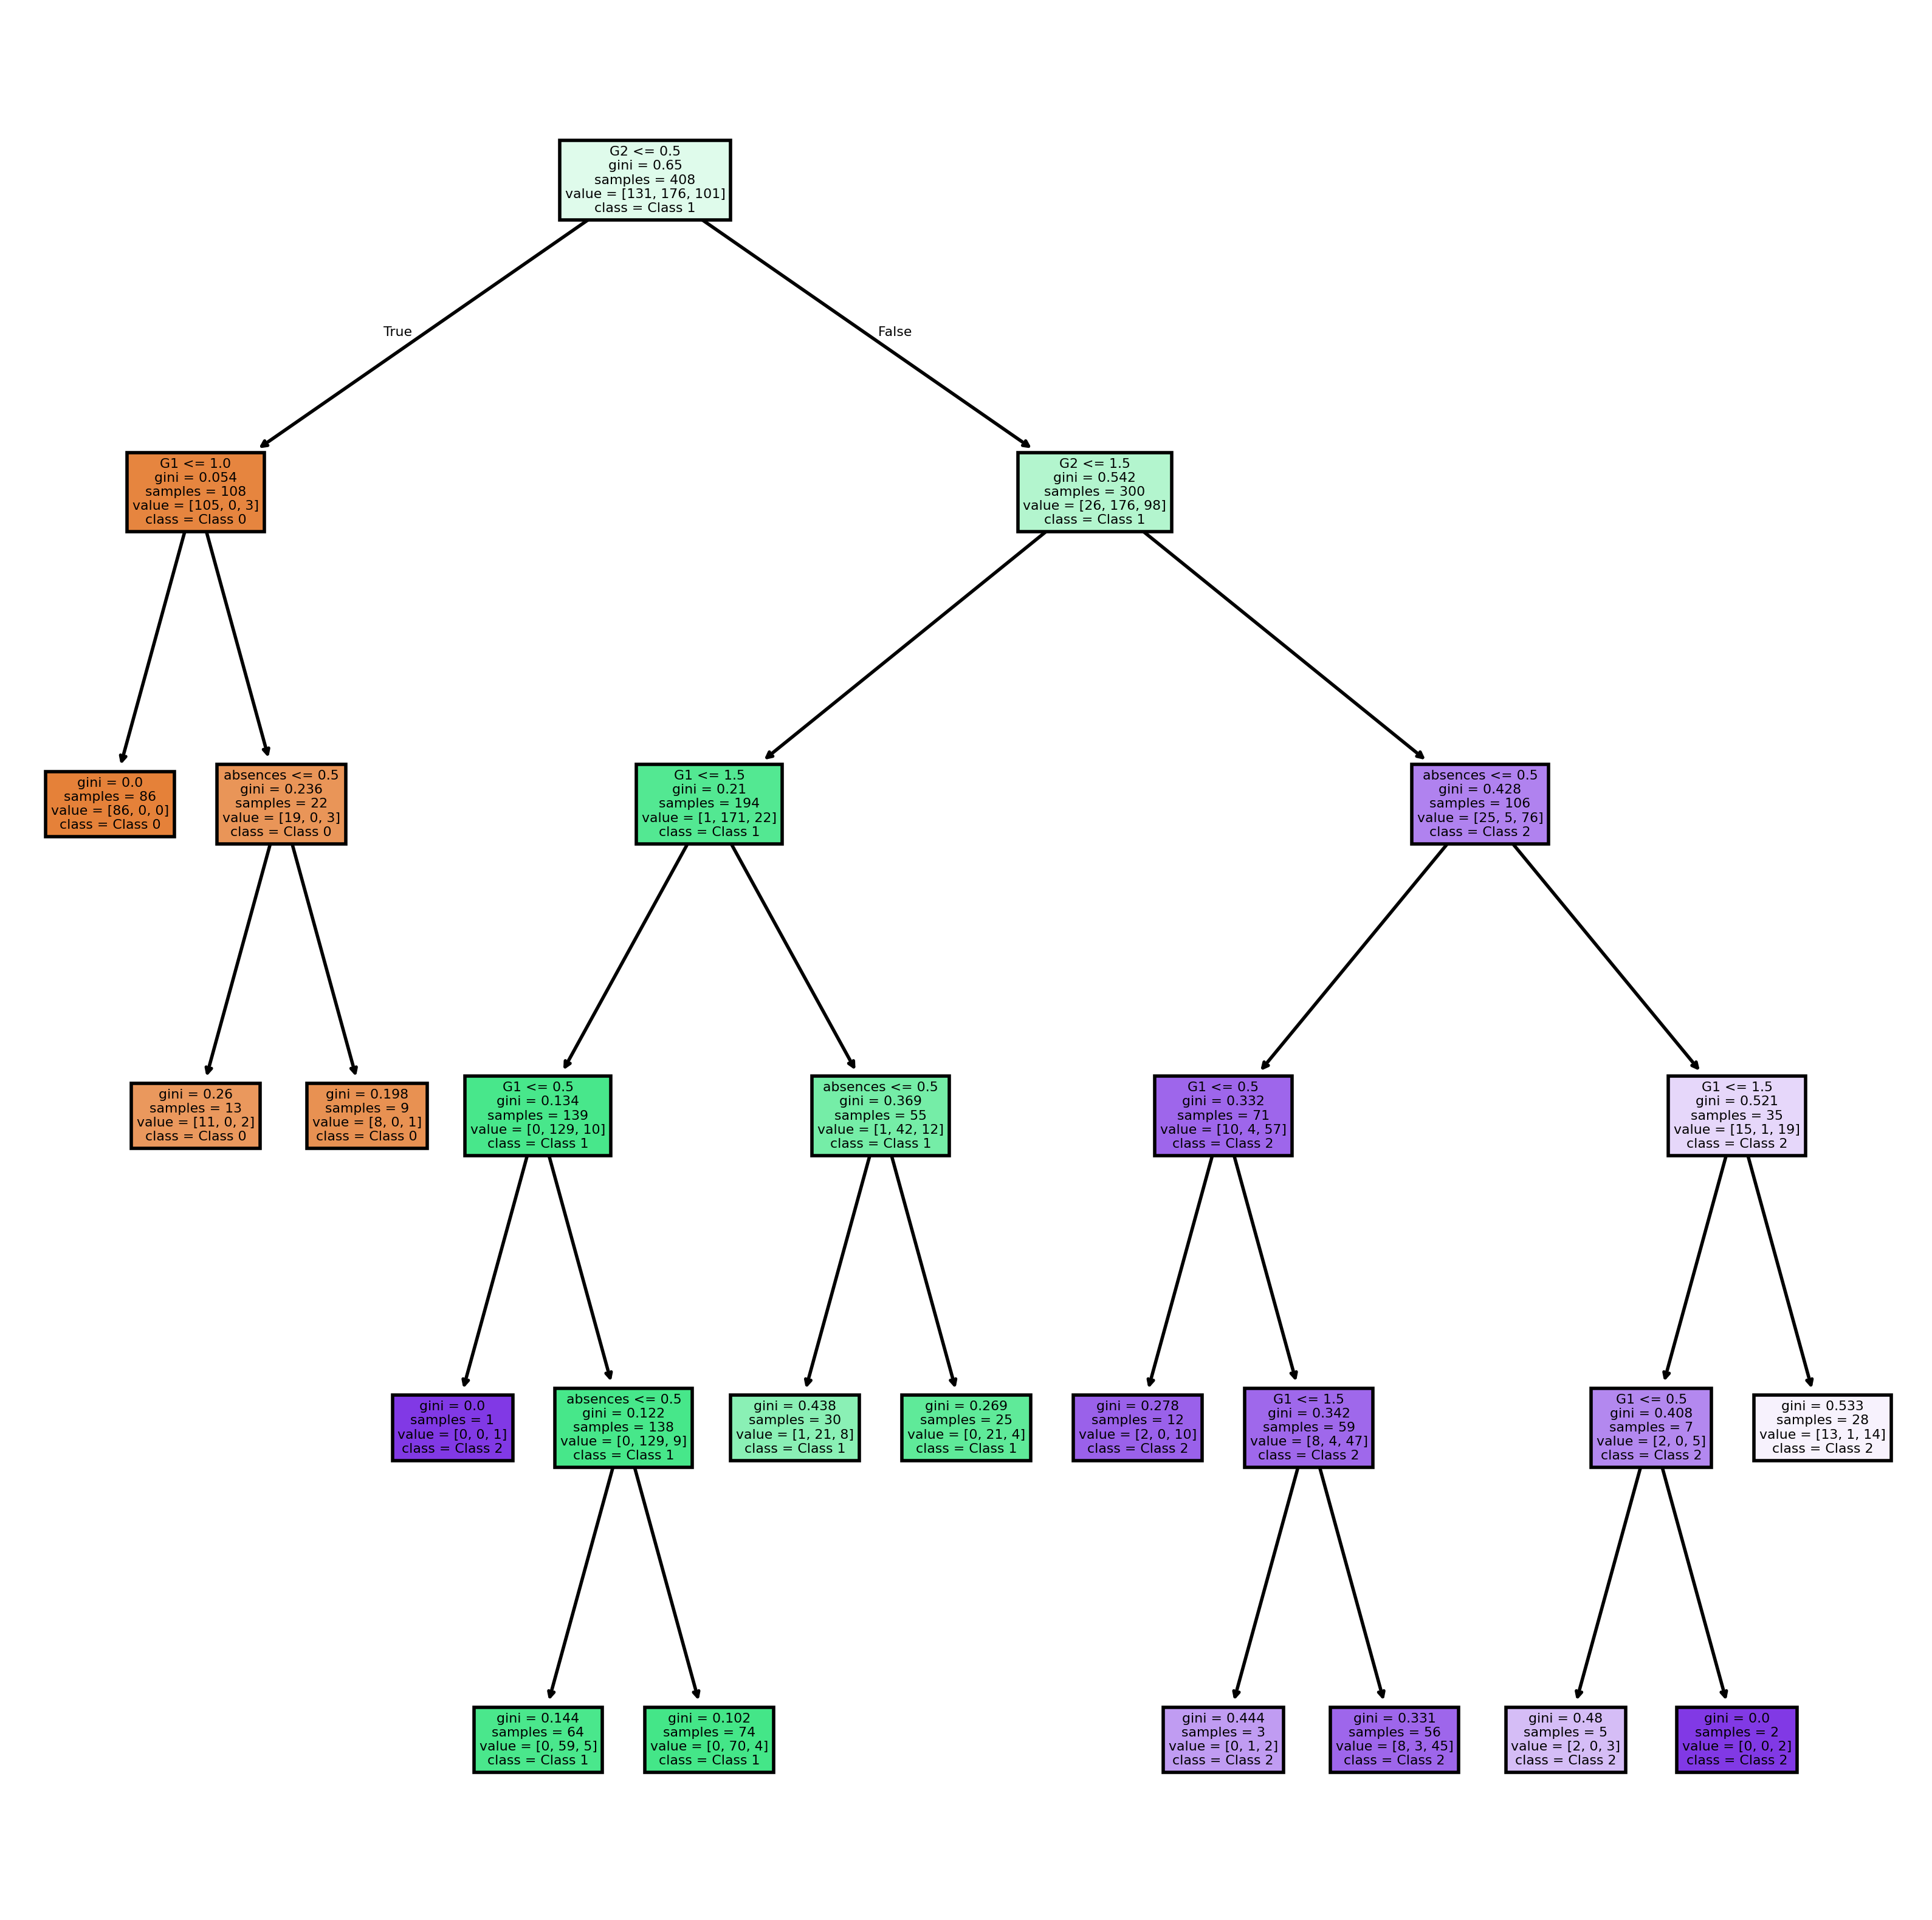

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
feature_names = X.columns
# Get unique class labels from the target variable
class_labels = {i: f'Class {i}' for i in y_train.unique()}

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=400)
from sklearn.tree import plot_tree
plot_tree(clf,
          feature_names=feature_names,
          # Create a list of class names dynamically
          class_names=[class_labels[i] for i in range(len(class_labels))],
          filled=True)
plt.show()

^ This Decision Tree above shows how the model makes predictions based on features like absences, G1, and G2, using the Gini index to make splits and decide the class. If the predicted class is 0, G3 is low; if 1, G3 is medium; and if 2, G3 is high. The tree starts at the root with G2 <= 0.5 and splits the data into two paths: True (left) or False (right). Each step evaluates features like absences or G1 to refine the splits further. At the end of each path (leaf), the tree predicts whether the final grade (G3) is low (class 0), medium (class 1), or high (class 2), based on the provided data.

now for **clustring**, we are going to take our whole original dataset but normalized to

1- apply k-means clustring (faster and better for our large dataset)

2- calculate Silhouette coefficient

3- calculate Elbow

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the uploaded dataset to examine its structure and contents
file_path = 'student-por-encoded.csv'
datasetNor = pd.read_csv(file_path)

#The line below had extra indentation, it is removed here
columns_to_normalize = ['school', 'sex','age','address','famsize','Pstatus', 'Medu', 'Fedu','Mjob','Fjob','reason','guardian', 'traveltime', 'studytime', 'failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences','G1','G2','G3']

minmax_scaler = MinMaxScaler()
datasetNor[columns_to_normalize] = minmax_scaler.fit_transform(datasetNor[columns_to_normalize])
data_normailzed = datasetNor.copy()
data_normailzed.to_csv('data_normailzed.csv', index=False)
data_normailzed.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.500000,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.75,0.50,0.75,0.0,0.00,0.5,0.266667,0.000000,0.428571,0.384615
1,0.0,0.0,0.333333,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.00,0.50,0.50,0.0,0.00,0.5,0.133333,0.473684,0.428571,0.384615
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.75,0.50,0.25,0.5,0.50,0.5,0.400000,0.631579,0.571429,0.461538
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.50,0.25,0.25,0.0,0.00,1.0,0.000000,0.736842,0.642857,0.615385
4,0.0,0.0,0.166667,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.75,0.50,0.25,0.0,0.25,1.0,0.000000,0.578947,0.571429,0.538462


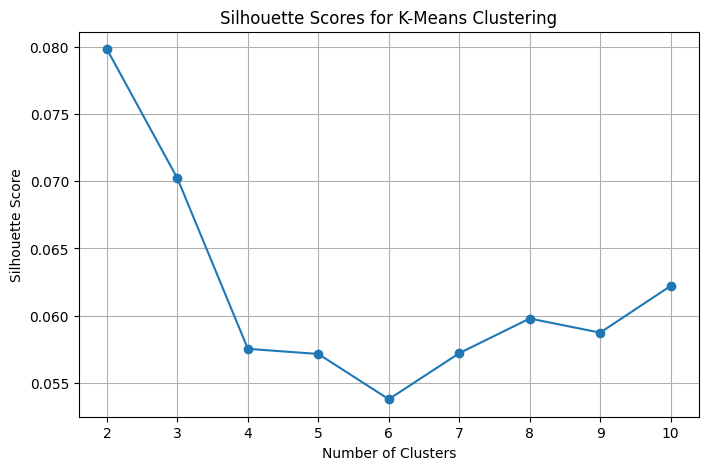

best number of clusters based on silhouette score: 2


In [ ]:
# applying k-means valuse ranges from 2-10 to the normlized dataset and calculate Silhouette and elbow
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data_normailzed.csv'
data = pd.read_csv(file_path)

cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f'best number of clusters based on silhouette score: {optimal_clusters}')


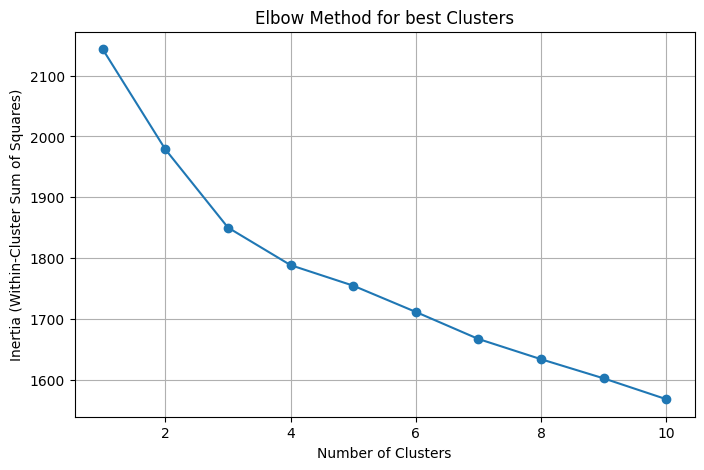

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_path = 'data_normailzed.csv'
data = pd.read_csv(file_path)


cluster_range = range(1, 11)
inertia_values = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for best Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


best number of clusters based on elbow method score and as we can see the elbow : 3

Silhouette Scores:

the first graph shows the Silhouette Scores for different numbers of clusters (K). The Silhouette Score is a measure of how well each data point fits within its assigned cluster, with a score ranging from -1 to 1. A higher score (0.080) wich is goes to when number of clusters is 2 indicates that the data point is well-matched to its own cluster and poorly matched to other clusters.

Elbow Method:

This graph shows the relationship between the number of clusters (K) and the "Within-Cluster Sum of Squares" (WCSS). The WCSS represents the total distance between each data point and the center of its assigned cluster. The graph has a characteristic "elbow" shape, which suggests that the optimal number of clusters is around 3 or 4, as adding more clusters beyond that point doesn't significantly reduce the WCSS.

now we will test k when it's 2,3,4

In [ ]:
# Apply K-means for the selected K values and visualize results
selected_k_values = [2, 3, 4]

# Store clustering results for interpretation
clustering_results = {}

for k in selected_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    clustering_results[k] = labels

    # Calculate metrics
    inertia_value = kmeans.inertia_
    silhouette_value = silhouette_score(X, labels)

    print(f"K={k}: Inertia={inertia_value:.2f}, Silhouette Coefficient={silhouette_value:.2f}")


K=2: Inertia=1978.80, Silhouette Coefficient=0.08
K=3: Inertia=1850.26, Silhouette Coefficient=0.07
K=4: Inertia=1788.51, Silhouette Coefficient=0.06


k=2: Inertia = 1978.80

k=3: Inertia = 1850.26 (a decrease compared to k=2, indicating better clustering).


k=4: Inertia = 1788.51 (further improvement with more clusters).

Conclusion:
As k increases, inertia decreases, meaning the data points within each cluster become more tightly grouped.
_____________________________________________________________________
Close to 1: Well-separated clusters.
Close to 0: Overlapping clusters.
Negative values: Points assigned to incorrect clusters.
Analysis of Values:


k=2: Silhouette Coefficient = 0.08

k=3: Silhouette Coefficient = 0.07 (slightly lower than)

k=4: Silhouette Coefficient = 0.06 (further decrease).
Conclusion:
The silhouette coefficient decreases as k increases, indicating that the clusters become less distinct and more overlapping.
